In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_anime = pd.read_csv('anime.csv')
df_rating = pd.read_csv('rating.csv')

In [3]:
df_anime.shape

(12294, 7)

In [4]:
df_anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [6]:
df_anime.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

<ul>
    <li>anime_id - myanimelist.net's unique id identifying an anime.</li>
    <li>name - full name of anime.</li>
    <li>genre - comma separated list of genres for this anime.</li>
    <li>type - movie, TV, OVA, etc.</li>
    <li>episodes - how many episodes in this show. (1 if movie).</li>
    <li>rating - average rating out of 10 for this anime.</li>
    <li>members - number of community members that are in this anime's "group".</li>

In [7]:
df_anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [8]:
df_anime.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

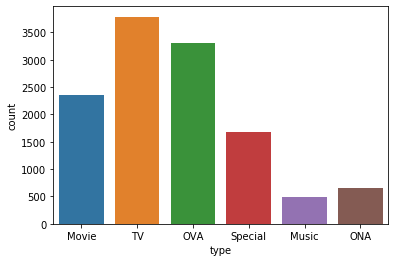

In [9]:
sns.countplot(df_anime['type'])

In [10]:
df_rating.shape

(7813737, 3)

In [11]:
df_rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [12]:
df_rating.columns

Index(['user_id', 'anime_id', 'rating'], dtype='object')

<li>user_id - non identifiable randomly generated user id.</li>
<li>anime_id - the anime that this user has rated.</li>
<li>rating - rating out of 10 this user has assigned (-1 if the user watched it but didn't assign a rating).</li>

<b>This data set contains information on user preference data from 73,516 users on 12,294 anime. Each user is able to add anime to their completed list and give it a rating and this data set is a compilation of those ratings.</b>

In [13]:
df_rating.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [14]:
df_rating['rating'].value_counts()

 8     1646019
-1     1476496
 7     1375287
 9     1254096
 10     955715
 6      637775
 5      282806
 4      104291
 3       41453
 2       23150
 1       16649
Name: rating, dtype: int64

In [15]:
df_rating['rating'].replace({-1: np.nan}, inplace = True)
df_rating.head()

,user_id,anime_id,rating
0,1,20,NaN
1,1,24,NaN
2,1,79,NaN
3,1,226,NaN
4,1,241,NaN


In [16]:
df_rating['rating'].value_counts()

8.0     1646019
7.0     1375287
9.0     1254096
10.0     955715
6.0      637775
5.0      282806
4.0      104291
3.0       41453
2.0       23150
1.0       16649
Name: rating, dtype: int64

In [17]:
df_rating.isnull().sum()

user_id           0
anime_id          0
rating      1476496
dtype: int64

In [18]:
df = df_rating.merge(df_anime, on='anime_id', suffixes=['_x', ''])

In [19]:
df.rename(columns = {'rating_x':'user_rating'}, inplace = True)

In [20]:
df.head()

,user_id,anime_id,user_rating,name,genre,type,episodes,rating,members
0,1,20,NaN,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,8.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,NaN,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,NaN,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297


In [21]:
df.drop(['anime_id', 'genre', 'episodes', 'rating', 'members'], axis = 1, inplace = True)

In [22]:
df['user_rating'].value_counts()

8.0     1646019
7.0     1375287
9.0     1254094
10.0     955715
6.0      637775
5.0      282806
4.0      104291
3.0       41453
2.0       23150
1.0       16649
Name: user_rating, dtype: int64

In [43]:
def changingLabels(number):
    return str(number/10**3) + "K"

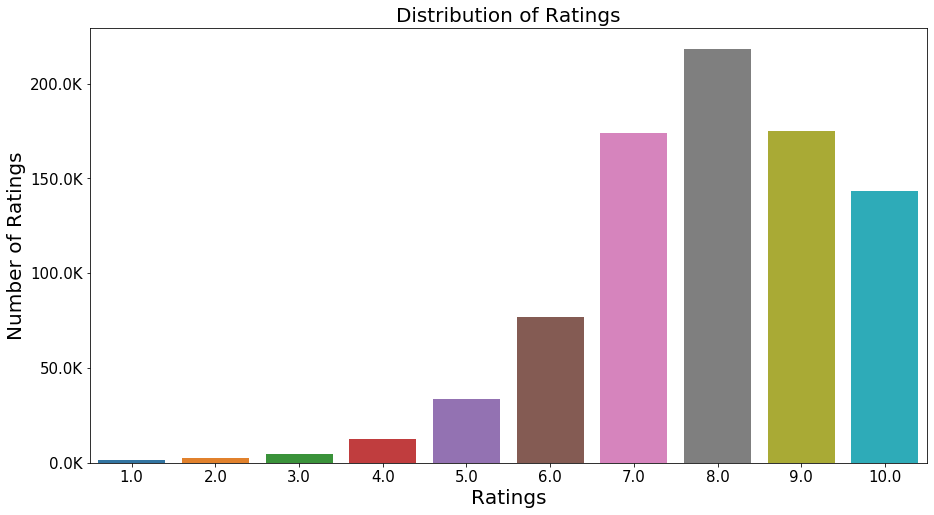

In [45]:
# %matplotlib notebook
plt.figure(figsize = (15, 8))
ax = sns.countplot(x="user_rating", data=df)

ax.set_yticklabels([changingLabels(num) for num in ax.get_yticks()])

plt.tick_params(labelsize = 15)
plt.title("Distribution of Ratings", fontsize = 20)
plt.xlabel("Ratings", fontsize = 20)
plt.ylabel("Number of Ratings", fontsize = 20)
plt.show()

In [25]:
df.head()

,user_id,user_rating,name,type
0,1,NaN,Naruto,TV
1,3,8.0,Naruto,TV
2,5,6.0,Naruto,TV
3,6,NaN,Naruto,TV
4,10,NaN,Naruto,TV


In [26]:
('Unique user_is: ', df['user_id'].nunique())

('Unique user_is: ', 73515)

In [27]:
('Unique name: ', df['name'].nunique())

('Unique name: ', 11196)

In [28]:
df = df[df['type'] == 'Movie']

In [29]:
utility_matrix = df.pivot_table(index=['user_id'], columns=['name'], values='user_rating')

In [30]:
utility_matrix.head()

name,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Movie,.hack//G.U. Trilogy,.hack//The Movie: Sekai no Mukou ni,009 Re:Cyborg,00:08,1000-nen Joou: Queen Millennia,1001 Nights,11-nin Iru!,12-gatsu no Uta,...,Yuu☆Yuu☆Hakusho: Meikai Shitou-hen - Honoo no Kizuna,Yu☆Gi☆Oh! (1999),Yu☆Gi☆Oh!: Hikari no Pyramid,Yu☆Gi☆Oh!: The Dark Side of Dimensions,Zawazawa,Ziggy: Soreyuke! R&amp;R Band,Zutto Mae kara Suki deshita.: Kokuhaku Jikkou Iinkai,eX-Driver the Movie,gdgd Fairies Movie: tte Iu Eiga wa Dou kana...?,xxxHOLiC Movie: Manatsu no Yoru no Yume
user_id,,,,,,,,,,,,,,,,,,,,,
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
normalize_utility_matrix = utility_matrix.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)

In [32]:
normalize_utility_matrix.fillna(0, inplace=True)
normalize_utility_matrix = normalize_utility_matrix.T
normalize_utility_matrix = normalize_utility_matrix.loc[:, (normalize_utility_matrix != 0).any(axis=0)]

In [33]:
sparse_utility_matrix = sp.sparse.csr_matrix(normalize_utility_matrix.values)

In [34]:
from sklearn.metrics.pairwise import cosine_similarity
item_similarity = cosine_similarity(sparse_utility_matrix)

In [35]:
item_similarity

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.        , -0.00445859, ..., -0.00546942,
         0.00545299,  0.00109383],
       [ 0.        , -0.00445859,  1.        , ..., -0.00268638,
         0.02375485, -0.00529575],
       ...,
       [ 0.        , -0.00546942, -0.00268638, ...,  1.        ,
         0.        ,  0.00432025],
       [ 0.        ,  0.00545299,  0.02375485, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        ,  0.00109383, -0.00529575, ...,  0.00432025,
         0.        ,  1.        ]])

In [36]:
item_similarity = pd.DataFrame(item_similarity, index = normalize_utility_matrix.index, columns = normalize_utility_matrix.index)

In [37]:
item_similarity.head()

name,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Movie,.hack//G.U. Trilogy,.hack//The Movie: Sekai no Mukou ni,009 Re:Cyborg,00:08,1000-nen Joou: Queen Millennia,1001 Nights,11-nin Iru!,12-gatsu no Uta,...,Yuu☆Yuu☆Hakusho: Meikai Shitou-hen - Honoo no Kizuna,Yu☆Gi☆Oh! (1999),Yu☆Gi☆Oh!: Hikari no Pyramid,Yu☆Gi☆Oh!: The Dark Side of Dimensions,Zawazawa,Ziggy: Soreyuke! R&amp;R Band,Zutto Mae kara Suki deshita.: Kokuhaku Jikkou Iinkai,eX-Driver the Movie,gdgd Fairies Movie: tte Iu Eiga wa Dou kana...?,xxxHOLiC Movie: Manatsu no Yoru no Yume
name,,,,,,,,,,,,,,,,,,,,,
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
&quot;Bungaku Shoujo&quot; Movie,0.0,1.000000,-0.004459,-0.005419,-0.004126,-0.008273,0.000425,0.014523,0.010002,-0.012785,...,-0.000440,0.000082,-0.004746,0.006380,-0.009766,0.013334,-0.000292,-0.005469,0.005453,0.001094
.hack//G.U. Trilogy,0.0,-0.004459,1.000000,0.109736,0.023144,0.008691,-0.004668,0.011649,-0.006021,-0.000528,...,0.003754,0.014485,0.004024,0.000000,-0.000404,0.000000,-0.001214,-0.002686,0.023755,-0.005296
.hack//The Movie: Sekai no Mukou ni,0.0,-0.005419,0.109736,1.000000,0.017876,-0.002015,-0.009880,-0.001210,-0.006041,0.000000,...,-0.002433,0.005134,0.000719,-0.004786,0.000000,0.000000,0.000466,-0.002584,0.000000,-0.008503
009 Re:Cyborg,0.0,-0.004126,0.023144,0.017876,1.000000,-0.000931,0.030510,-0.001980,0.000366,-0.013745,...,0.000571,0.020364,0.020772,0.000000,-0.011032,0.000000,0.010509,0.004185,0.000000,-0.003477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ziggy: Soreyuke! R&amp;R Band,0.0,0.013334,0.000000,0.000000,0.000000,0.000000,0.000000,0.005284,0.008724,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.003632,-0.028378,0.000000,-0.029791
Zutto Mae kara Suki deshita.: Kokuhaku Jikkou Iinkai,0.0,-0.000292,-0.001214,0.000466,0.010509,0.000000,-0.026850,-0.001128,-0.005237,0.000000,...,0.005626,0.002089,0.003129,0.000000,-0.005716,0.003632,1.000000,0.000495,0.000000,0.000150
eX-Driver the Movie,0.0,-0.005469,-0.002686,-0.002584,0.004185,0.000000,-0.001294,-0.000150,-0.000306,0.000000,...,0.003535,0.007721,0.007435,0.000000,0.000000,-0.028378,0.000495,1.000000,0.000000,0.004320


In [38]:
def get_top_recommendations(movie_name):
    count = 1
    print('Recommendation to:', movie_name)
    print()
    for item in item_similarity.sort_values(by = movie_name, ascending = False).index[1:11]:
        print(item)
get_top_recommendations('Omake')

In [39]:
get_top_recommendations('Omake')

Recommendation to: Omake

Satsujinkyou Jidai
Ni-hiki no Sanma
Heya
Youkoso Uchuujin
G-senjou no Higeki
Kitte no Gensou
Toufu Kozou
Ziggy: Soreyuke! R&amp;R Band
Mado
Tonari no Yarou
